In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from GANime.gan import GAN, plotter
from GANime.datasets import ImageOnlyDataset

In [17]:
from torch.utils.data import DataLoader
import torchvision.transforms as T

resize_transform = T.Compose([
    T.Resize(64),
    T.ToTensor(),
    T.Lambda(lambda x: x/127.5-1) #normalize color channels to -1 and 1
])

ds = ImageOnlyDataset('data/anime_portraits/out2', resize_transform)
dl = DataLoader(ds, batch_size=128, shuffle=True)

has renormalize


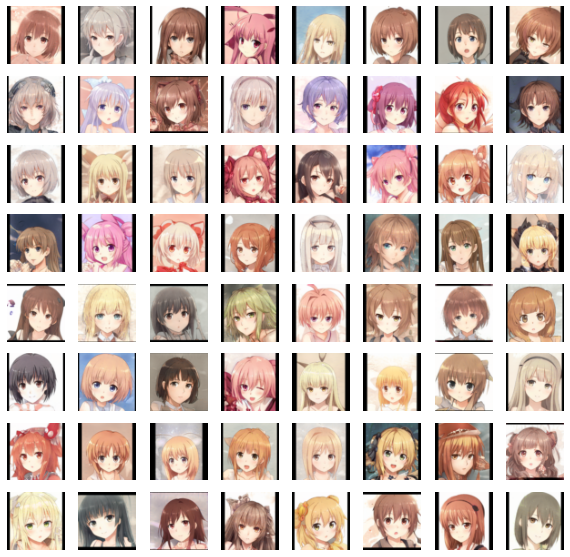

In [18]:
it = next(iter(dl))
plotter(it, rows=8, columns=8, renormalize_func = lambda x: x*127.5+127.5)

In [20]:
seed_size = 128
gan_model = GAN(seed_size)
gan_model.train(dl,
                num_epochs = 100,
                batch_size = 128,
                plot = True,)